In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('diabetes.csv')

In [11]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

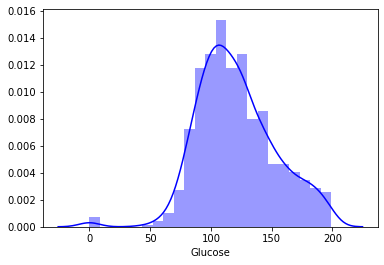

In [14]:
sns.distplot(df['Glucose'],color='blue')

In [17]:
#x = data.drop(['Outcome'],axis=1)

In [26]:
#y = data['Outcome']

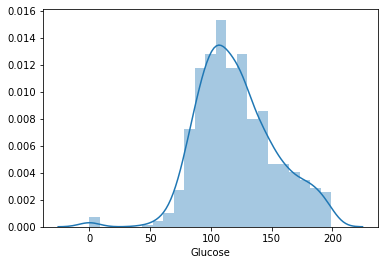

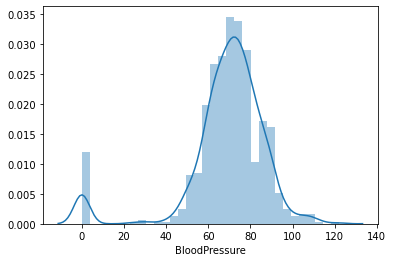

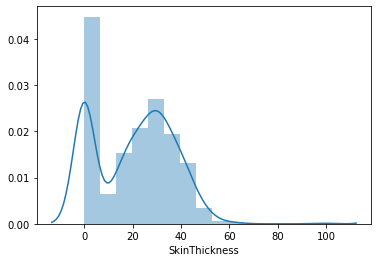

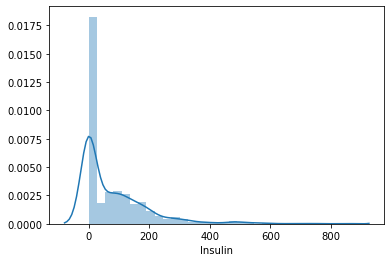

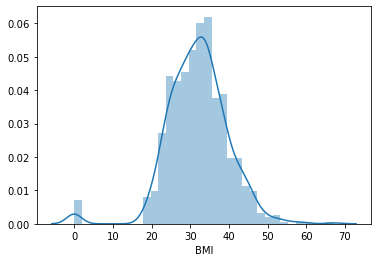

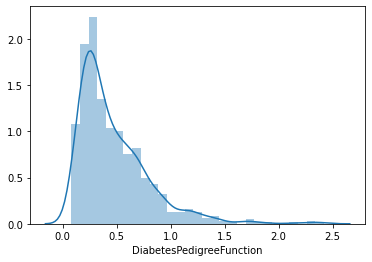

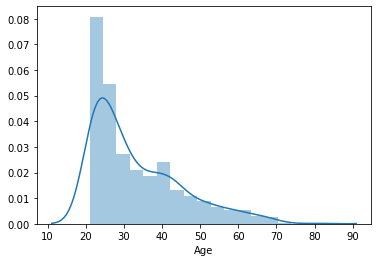

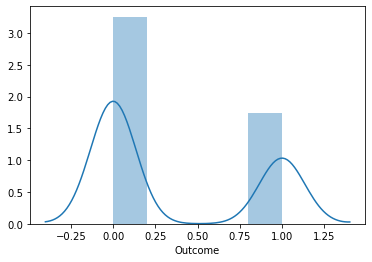

In [62]:
plot_num = 0
for col in df:
    if col != 'Pregnancies':
        sns.distplot(df[col])
        plt.show()
        

In [1]:
import seaborn as sns

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


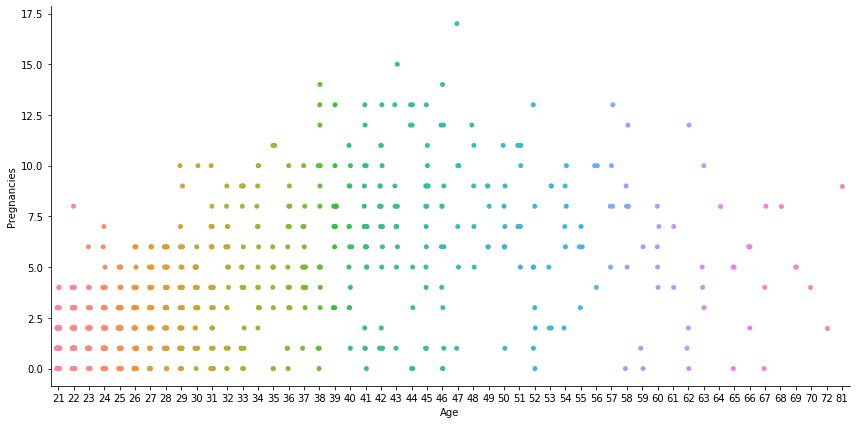

In [30]:
sns.catplot(x='Age',y='Pregnancies',data=df,aspect=2,height=6)

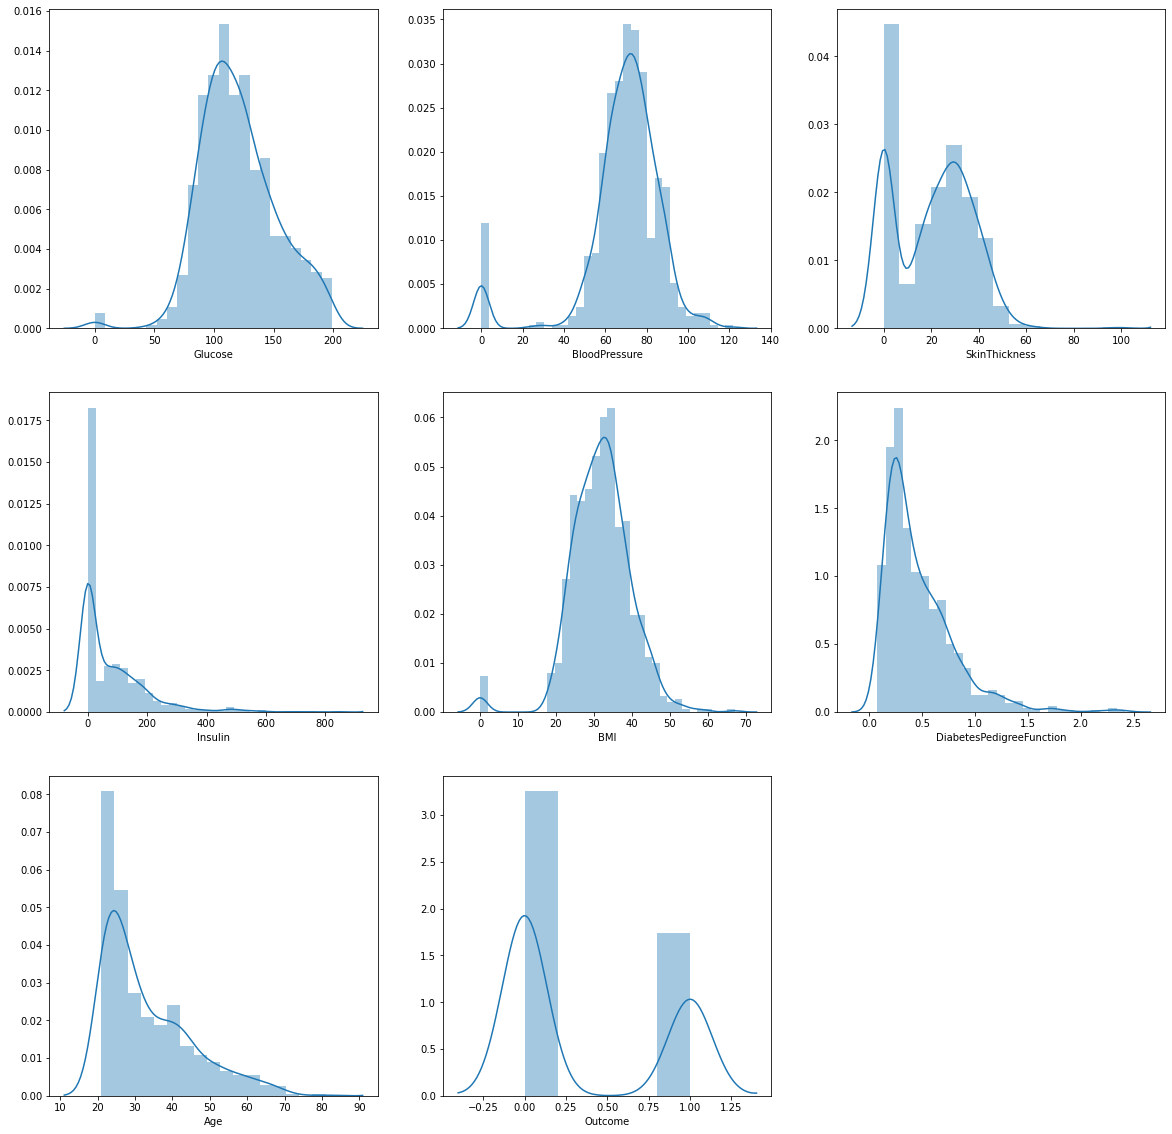

In [102]:
plt.figure(figsize=(20,20),facecolor='w')
fig_no = 1
for col in df:
    if col != 'Pregnancies':
        ax = plt.subplot(3,3,fig_no)
        sns.distplot(df[col],)
        fig_no = fig_no +1
plt.show()

In [120]:
print(df['Glucose'] <= 0)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool


In [122]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)

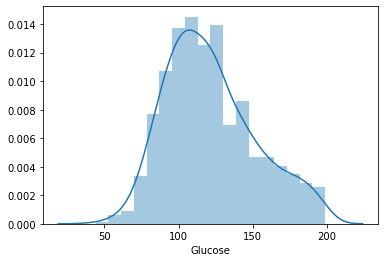

In [124]:
sns.distplot(df['Glucose'])

In [136]:
x = df.drop(['Pregnancies','Outcome'],axis = 1)
y = df['Outcome']

In [137]:
from sklearn.model_selection import train_test_split

In [163]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.25,random_state = 100)

In [164]:
from sklearn import linear_model

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
model = LogisticRegression()

In [167]:
model.fit(x,y)

LogisticRegression()

In [168]:
import pickle

In [169]:
file_name = 'Logistic_pratice'
pickle.dump(model,open(file_name,'wb'))

In [170]:
pickle.load(open(file_name,'rb'))

LogisticRegression()

In [171]:
y_pred = model.predict(test_x)

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [175]:
accuracy = accuracy_score(test_y,y_pred)
accuracy

0.7395833333333334

In [177]:
confusion_matrix(test_y,y_pred)

array([[106,  21],
       [ 29,  36]])

In [178]:
TP = 106
FP = 21
FN = 29
TN = 36

In [183]:
accuracy = (TP+TN)/(TP+FP+FN+FP)
accuracy

0.8022598870056498

In [186]:
Precision = (TP)/(TP+TN)

In [187]:
Precision

0.7464788732394366

In [188]:
recall = (TP)/(TP+FN)
recall

0.7851851851851852

In [191]:
F1score = 2*(Precision*recall)/(Precision+recall)
F1score

0.7653429602888087

In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

In [193]:
roc_curve(test_y,y_pred)

(array([0.        , 0.16535433, 1.        ]),
 array([0.        , 0.55384615, 1.        ]),
 array([2, 1, 0]))

In [204]:
fpr , tpr, threashholds = roc_curve(test_y, y_pred)

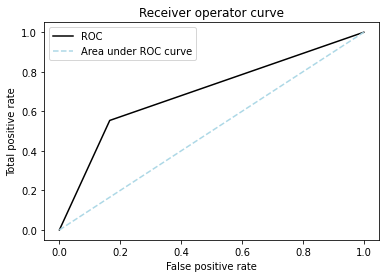

In [231]:
plt.plot(fpr,tpr,color = 'black',label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('Total positive rate')
plt.title('Receiver operator curve')
plt.plot([0,1],[0,1],label = 'Area under ROC curve',color = 'LightBlue',linestyle = '--')
plt.legend()
plt.show()